# Training a Multilayer Neural Network for Image Classification

First, let's import the necessary packages

In [6]:
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [7]:
# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

The MNIST dataset is a set of images of handwritten digits 0-9, with the associated target classes also numbered as 0-9. 

In [8]:
digits_mnist = keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Let's look at the shape and data of the training set

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

Instead of eventually doing cross validation on the training set, let's further break the training set into a training set and a validation set, as this is more reliable, if we have the data to do it. Let's also scale the intensities of each pixel to be in the range 0-1.


In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's look at the first image in the training set:

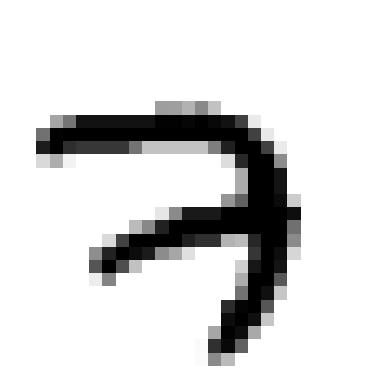

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are numbers that correspond to the class names

In [13]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Here are the corresponding class names:

In [14]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
class_names[y_train[0]]

'7'

Let's look at the sizes for our train, validation and test sets:

In [15]:
X_train.shape

(55000, 28, 28)

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

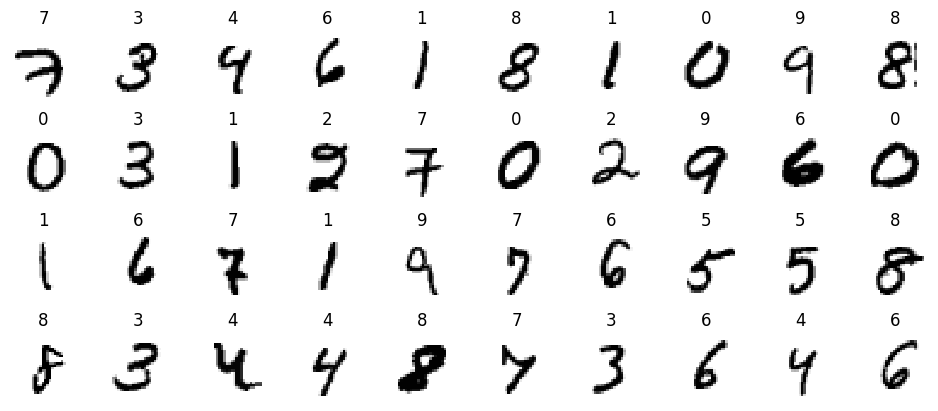

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<!--Let's build a neural network with <b>five</b> hidden layers. Let's setup our random seeds for reproducibility-->
Let's build a neural network with <b>two</b> hidden layers. Let's setup our random seeds for reproducibility

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Let's use the simplest sequential model. 
* We build our input layer that flattens the images into a 1D array.

* First, we add a dense hidden layer with 200 neurons; it manages its own weight matrix and bias terms, and uses the ReLU activation function.

* Next, we add a second hidden layer with 60 neurons and the ReLU activation function.

<!--
* Next, we add a second hidden layer with 100 neurons and the ReLU activation function.
* Then we add a third hidden layer with 35 neurons and the ReLU activation function.
-->

* Finally, we add the output layer with 10 neurons (for the 10 output classes). Since we must choose one of those 10 classes, we use the softmax activation function, rather than the sigmoid activation function. Softmax can handle the multinomial classification problem. 

In [20]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(60, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# View a summary of the newly created model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 60)                12060     
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 169,670
Trainable params: 169,670
Non-trainable params: 0
_________________________________________________________________


Here is a more visually repersentative depiction of the model:

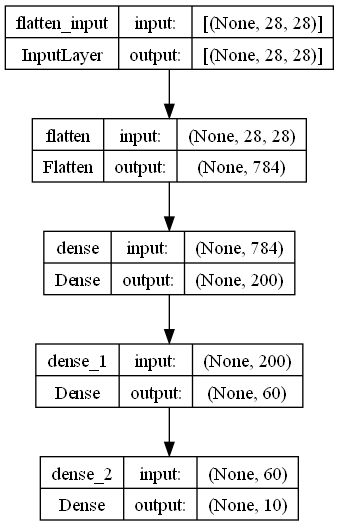

In [21]:
keras.utils.plot_model(model, "my_digit_mnist_model.png",show_shapes=True)

You can access the model's layers and individual layers as below. 

In [22]:
model.layers


Not of significant importance, but notice how our count of layers is accessible.  It's convenient!

In [23]:
hidden1 = model.layers[1]
hidden1.output

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense')>

In [24]:
model.get_layer(hidden1.name) is hidden1

True

You can also see the parameters for a particular layer

In [25]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02940432, -0.07224602, -0.03680543, ...,  0.0272449 ,
         0.07778512,  0.07293907],
       [-0.01940935,  0.01388306,  0.02421581, ...,  0.01342396,
         0.04928169, -0.04231308],
       [ 0.03120589,  0.07135764,  0.07583933, ...,  0.02088162,
         0.05509311,  0.06542501],
       ...,
       [-0.06060447, -0.04186057, -0.00084657, ...,  0.04078439,
         0.00960232, -0.04506256],
       [ 0.04413473,  0.02929009,  0.05305888, ..., -0.04500476,
         0.03784166,  0.06462421],
       [ 0.03838325,  0.00820181,  0.01888839, ...,  0.04574746,
        -0.06803833, -0.00189687]], dtype=float32)

In [26]:
weights.shape

(784, 200)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
biases.shape

(200,)

After a model is created, you must call its compile() method to specify the loss function and optimizer to use. You can also optionally specify extra metrics to compute during training and evaluation. For more information, check out the<code>keras</code>documentation: https://keras.io/api/models/
To start out, we'll use a stochastic gradient descent model.

<h2>Critical points:</h2>
*  We use "sparse_categorical_crossentropy" because we have sparse labels.  </br>
   That is, for each instance examined, there is a target class index from 0-9.* </br>
* We will train the model using simple stochastic gradient descent  with a learning rate of 0.01 and momentum of 0. There are multiple parameters you can specify here.

\* Since this is a classifier, it's useful to measure the accuracy during training and evaluation<br/>
<p><b>*</b> Were we performing <i>binary</i> classification: 
<ul>
    <ol>
    <li>
        <b>Activation Function:</b> Sigmoid returns 0 or 1, so sigmoid would outperform softmax </li>
    <li>
        <b>Classification:</b> we'd use a <code>binary_crossentropy</code></li>     
    </ol>
</ul>
</p>

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.0),
              metrics=["accuracy"])

To train the model, we simply call the fit function. 
* We specify the epochs, and we provide our validation set. Since we have this validation set, we will not use cross validation. The training reports a training and validation loss and accuracy.
* fit() defaults to a batch_size of 32 This means that 32 sampled instances are used per epoch, and not the full training set. While it is the default value, it's important to note that it's been found that using the full training set can lead to suboptimal model generation. If a larger value is desired, stick to powers of 2.

In [30]:
# check if the 'mnist_model.h5' is present so we can load it
if os.path.isfile('mnist_model.h5'):
    print('Loading pretrained model:')
    model = keras.models.load_model('mnist_model.h5')
    history = model.fit(X_train, y_train, epochs=20,batch_size=32, validation_data=(X_valid, y_valid))
    
else:
    print('error loading model')
    history = model.fit(X_train, y_train, epochs=20,batch_size=32, validation_data=(X_valid, y_valid))

Loading pretrained model:
Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9804
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9800
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9800
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9804
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9806
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9804
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_lo

The fit() method returns a history object that contains the training parameters, list of epochs it went through, and a dictionary containing the loss and extra metrics measured at the end of each epoch. 

In [31]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

You can use this data to plot the bias-variance curve. You can see that we have still not overfit the model, so we could probably keep training for more epochs.
The validation set loss plot serves as our Test data line in the graph in the Performance Evaluation lecture, while the training set loss plot serves as the CV line in our graph in lecture

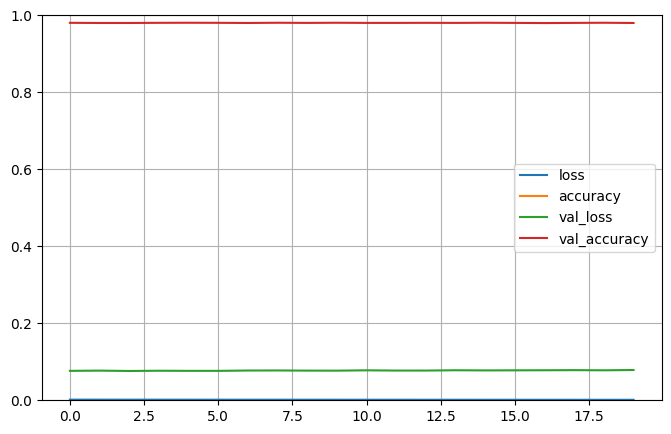

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Now that we've achieved >95% accuracy, it's time to interpret the model's performance.

To do so, we'll evaluate it on the test set to estimate the generalization error using the evaluate() method

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 840us/step - loss: 0.0889 - accuracy: 0.9791


[0.08894571661949158, 0.9790999889373779]

To employ **transfer learning, we can re-use the layer that we trained from the MNIST.  I realized this would be necessary once I tried trainning from my raw data and was getting very sensitive variance.

In [36]:
hidden1.trainable = False;

Next, use the predict() method to make predictions. Since we don't have new instances, let's just use the first 3 instances of the test set.

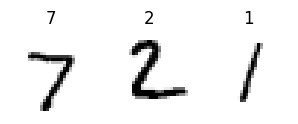

In [37]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

1/1 [==============================] - 0s 62ms/step


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 9.9997e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-05, 0.0000e+00]],
      dtype=float32)

As you can see above, there are three vecors in the array; each one corresponding to a sample in the subset.  Each vector is the resulting probabalistic predictions that the model estimates  for each class from 0 to 9. 

So to translate the array above to layman's:
* [1] is class 7 (number 7) with 100% probability class 7 (sneaker) with 3% probability. 
* [2] is class 2 (number 2) with 100% probability 
* [3] is class 1 (number 1) with 0.99% probability 

If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict() method instead

In [39]:
y_pred = model.predict(X_new)
# Disable Scientific Notation for easy reading
np.set_printoptions(suppress=True)
print(np.expand_dims(y_pred, axis=1)) 

1/1 [==============================] - 0s 14ms/step
[[[0.         0.         0.         0.00000016 0.         0.
   0.         0.9999999  0.         0.        ]]

 [[0.         0.00000008 0.9999999  0.00000009 0.         0.
   0.         0.         0.         0.        ]]

 [[0.         0.9999714  0.00000148 0.00000001 0.00000265 0.00000001
   0.00000056 0.00000358 0.00002033 0.        ]]]


In [40]:
pred = np.argmax(y_pred,axis=1)
np.array(class_names)[pred]

array(['7', '2', '1'], dtype='<U1')

Here the classifier classified all three images correctly.

In [41]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

And we can see the actual images too

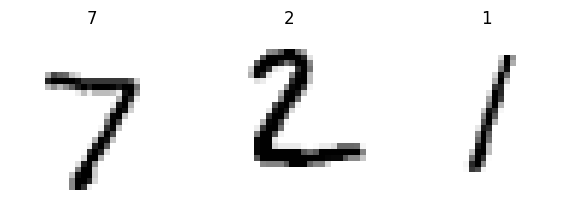

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [43]:
pretrained_output_shape = hidden1.output_shape[1:]
#plt.show(pretrained_output_shape)

Build and Save the model so we can use it for training future models.

In [44]:
model.build(X_new)
#model.summary()

In [45]:
import joblib
#save a model
#joblib.dump(model, "relu_mnist.pkl") 

model.save("mnist_model.h5")

#load a saved model
#forest_reg = joblib.load("relu_mnist.pkl") 

# Custom Dataset: Dysgraphia charset
I suffer from a clinical case of bad handwriting.  Courtesy of my university's Accessibility Center, I've got a nifty smart-pen that's able to record my handwriting.

I figured this was a great opportunity to perform some analysis with, so I got to writing a total of 144 digits (12 of each digit). This would make for a great test set, since it's data nobody's seen before.  I've decided to go with a Genetic Algorithm and a Convoluted Neural Network: the GA seems to me like it would be free of human bias, and courtesy of the random mutation, there would be a variety of tweaks performed to the images that ought to examine the various performance measures of the model more thoroughly.

### Be sure to mention that we're going to use decaying weights and some normalization

<i>The page prior to the pre-processing steps performed externally is pictured below</i>

To examine the images, we'll use the Pillow library to help us achieve this by converting the image into an 8-bit array (since RGB is 8-bit each color)

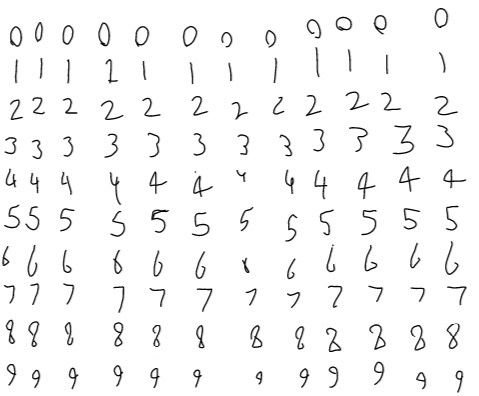

In [2]:
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image, ImageOps

Image.open('dysgraph_master.png')

## Further pre-processing

In order to help manage any discrepencies created by my writing, we'll normalize the text per the MNIST tutorial:
<p><i>All images are size normalized to fit in a 20x20 pixel box and there are centered in a 28x28 image using the center of mass.</i></p>

Here, we've produced some functions to perform this size-normalization process using the <code>ndimage</code> library:

In [3]:
X_custom, Y_custom  = [],[]

# loop through each image file in the directory
for filename in os.listdir('custom_data'):
    # read in the image and convert to grayscale
    img = Image.open(os.path.join('custom_data', filename)).convert('L')

    # threshold the image to create a binary mask
    img = img.point(lambda x: 0 if x < 120 else 255, '1')

    # find the center of mass
    x, y = np.array(img).nonzero()
    x_mean = int(np.mean(x))
    y_mean = int(np.mean(y))

    # crop image to a bounding box around the center of mass
    bbox = (y_mean-14, x_mean-14, y_mean+14, x_mean+14)
    img = img.crop(bbox)

    # resize to fit inside 20x20 box
    img = img.resize((20, 20))

    # pad the image with zeros to create a 28x28 array
    img = ImageOps.expand(img, border=(4, 4, 4, 4), fill=0)

    # convert the image to a numpy array and append to the list
    img_array = np.array(img).reshape((28, 28, 1))
    X_custom.append(img_array)

    # Don't forget the Y-label at the end of the filename!
    # extract the label from the filename
    label = int(filename.split("_")[1])
    # append the label to the list
    Y_custom.append(label)
    
# convert the list to a numpy array
X_custom = np.array(X_custom)
Y_custom = np.array(Y_custom)


In [4]:
print("X_Custom shape:", X_custom.shape)
print("Y_Custom shape:", Y_custom.shape)

X_Custom shape: (330, 28, 28, 1)
Y_Custom shape: (330,)


In [6]:
print(Y_custom)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


### Viewing the new set
#### Now that we've pre-processed our data, lets examine some a small subset of our test set. 

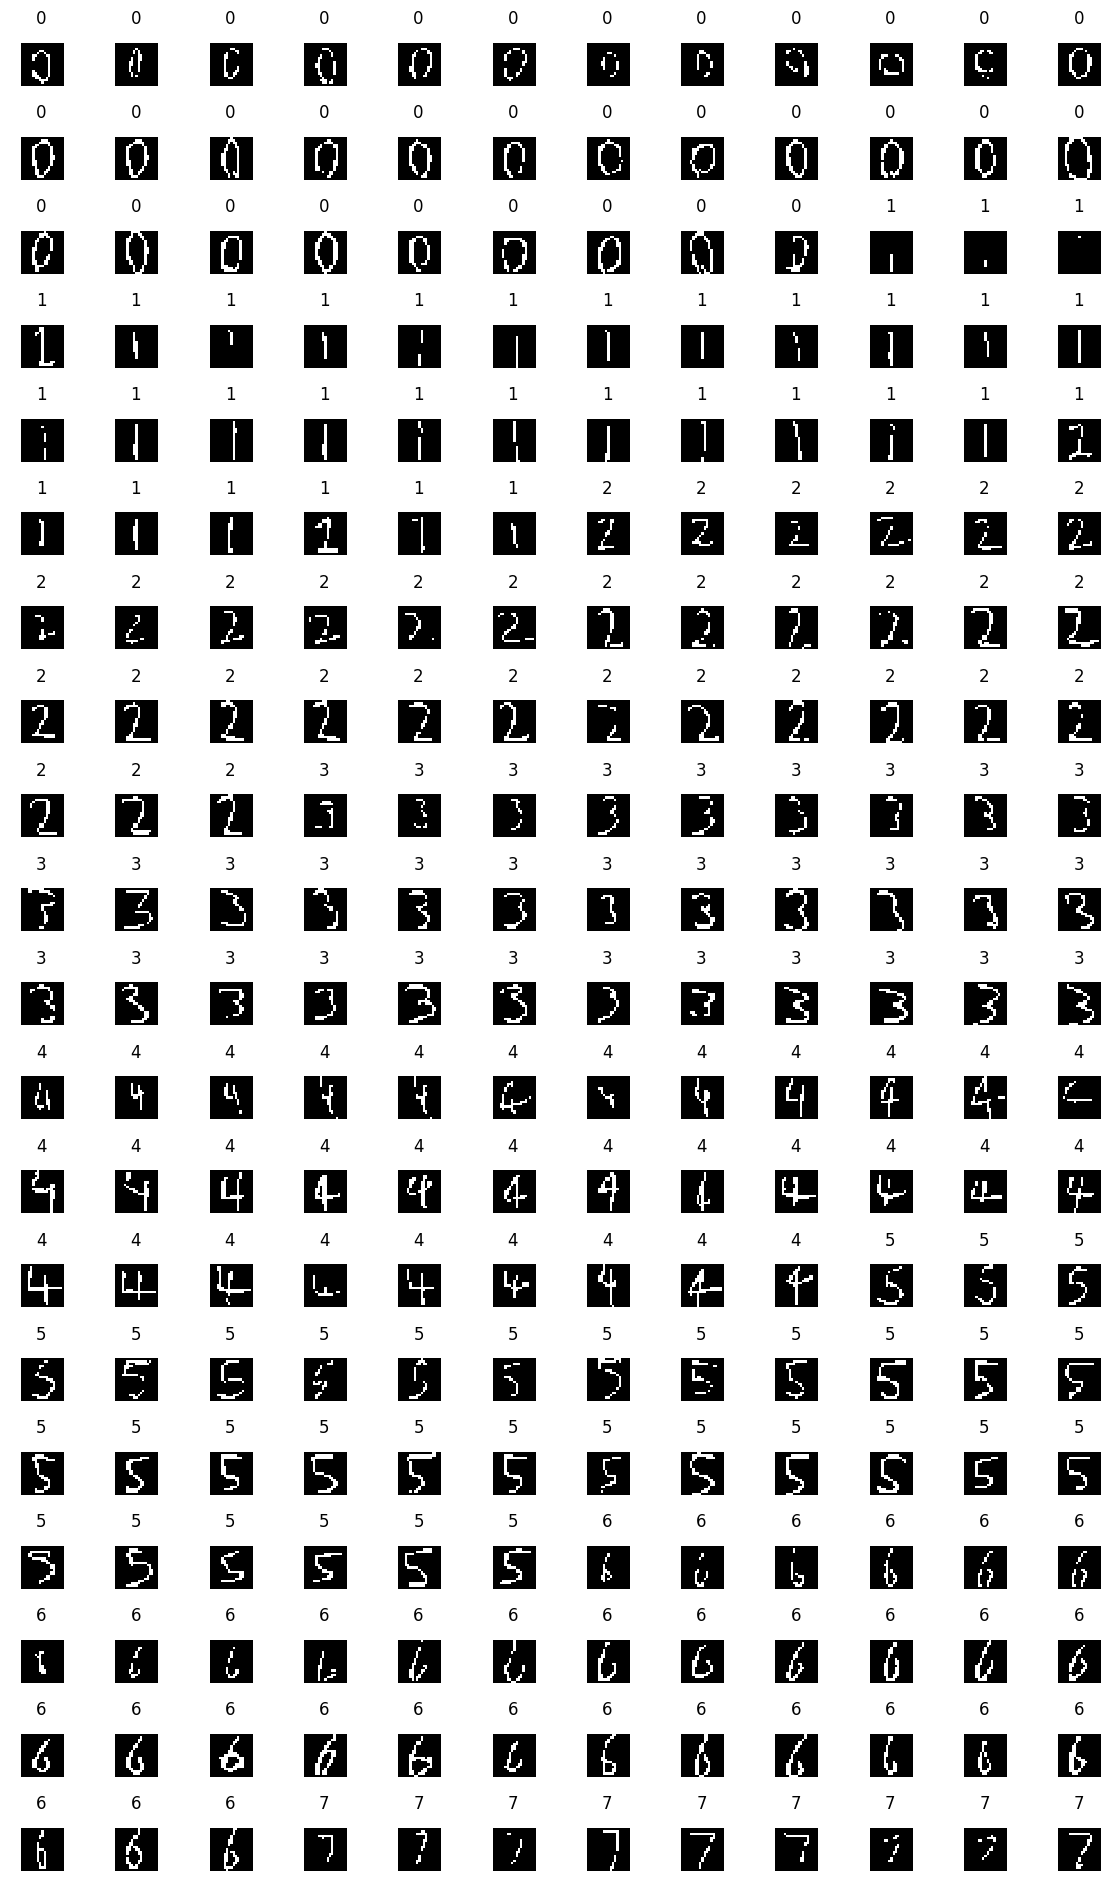

In [7]:
n_rows = 20
n_cols = 12
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        img_ind = index % len(X_custom)
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_custom[img_ind], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(Y_custom[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Splitting the dataset:

Since our images are already scaled to the 28x28 size, we can go ahead and divide our data.  Since we have a comparatively tiny sample size this time (N = 330), we'll use use k-fold cross validation.

In [8]:
from sklearn.model_selection import train_test_split
X_cust_train, X_cust_test = train_test_split(X_custom, test_size=0.2, random_state=42)

#Y_cust_train_enc, Y_cust_test_enc = train_test_split(Y_custom_encoded, test_size=0.2, random_state=42)
Y_cust_train, Y_cust_test = train_test_split(Y_custom, test_size=0.2, random_state=42)

X_cust_valid, X_cust_train = X_cust_train[:165], X_cust_train[165:] 
Y_cust_valid, Y_cust_train = Y_cust_train[:165], Y_cust_train[165:]

print("X_cust_train:", X_cust_train.shape)
print("Y_cust_train:", Y_cust_train.shape)

X_cust_train: (99, 28, 28, 1)
Y_cust_train: (99,)


### K-Fold Cross Validation:

We will use `tensorflow.keras` with **two** dense layers. Then, we compile the model via the *Adam* optimzer. This combines the AdaGrad and RMSProp, which is advantageous in situations where there's a lot of potential variance in the feature importance, and thus attempts to employ ***adaptive learning rates***.  This allows the learning rates to base itself on ther average of previous gradients to aid in convergence.

##### Loss Function
As the nature of our classification problem has gone unchanged, we will continue employing `sparse_categorical_crossentropy` for the loss function.  This is applicable when we have labels that are able to be represented as integers.  Since we're classifying *digits*, 0-9 is a range of *integers* so we've got all we need to make this a great justification.  

Under the hood, the cross-entropy calculates loss between predicted probabilities and the *true* labels.  What's impressive is that it does all this *without One-Hot Encoding.*

(I really didn't want to get into LaTeX, so I had a little help from Bard to nail down the syntax to get it to display in the notebook:)
$$\text{Loss} = -\sum_{i=1}^{C} y_i \log(p_i)$$
Where:
- (C) is the number of classes.
- (y<sub>i</sub>) is the true label for class (i) (0 or 1)
- (p<sub>i</sub>) is the predicted probability for class (i)


We'll need to define a validation set, this will be handled inside the loops for performing cross validation.

### Bin counts
Care must be taken as to not perform more splits than we may have in any of our small sets.  Let's perform a safety check:

In [9]:
# check the train and test sets
def check_class_distro(Y_labels):
    header = "Digit:   0  1  2  3  4  5  6  7  8  9"
    print((' ' * 6), header)
    print(f"N Occurences:", np.bincount(Y_labels))

We can take comfort here since the dataset was curated by me: I know there are 33 samples for each number, so less of any digit would indicate some poor pre-processing steps.

In [10]:
# check training data
check_class_distro(Y_custom)

       Digit:   0  1  2  3  4  5  6  7  8  9
N Occurences: [33 33 33 33 33 33 33 33 33 33]


In [11]:
# check training data
check_class_distro(Y_cust_train)

       Digit:   0  1  2  3  4  5  6  7  8  9
N Occurences: [ 9 12  6  8  9  8 10 13 12 12]


In [12]:
# check test data
check_class_distro(Y_cust_test)

       Digit:   0  1  2  3  4  5  6  7  8  9
N Occurences: [6 8 7 5 8 7 3 6 7 9]


There are only 6 instances of Class 2 samples that are in our test set, so we can't use any fewer that `N = 6` for the `n_splits` parameter in our folding.  

In [19]:
from keras.layers import Input
from copy import deepcopy

if os.path.isfile('mnist_model.h5'):
    model = keras.models.load_model('mnist_model.h5')
epochs = 20
model.trainable = False;
# grab the hidden layer from the model trained on the MNIST dataset
hidden1 = model.layers[1]

refined_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1),name='input'),
    hidden1,
    keras.layers.Dense(100, activation='relu',name='dense2'),
    keras.layers.Dense(10, activation='softmax',name='output'),
])

refined_model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),        
        optimizer=keras.optimizers.Adam(
            learning_rate=0.0002,
            beta_1=0.9,
            beta_2=0.9994,
            weight_decay=0.003,
            epsilon=1e-08,
            amsgrad=False
        ),
        metrics=keras.metrics.sparse_categorical_accuracy)

# avoid re-using any weights, bias, or 
unfit_refined_model = deepcopy(refined_model)

Above, we've re-used the trained hidden layer from the first model trained on the MNIST set to be used on a new model that we'll run against this set. 

In [20]:
refined_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense2 (Dense)              (None, 100)               20100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 21,110
Non-trainable params: 157,000
_________________________________________________________________


# Stratified K-Fold

Given how small our samples are, we'll opt for Stratified K-fold which attempts to balance under-represented classes during by performing selective splits on the data in each k-real and v-validation folds.  

In [21]:
from sklearn.model_selection import StratifiedKFold

# By using Stratified K-fold, we can assure that we have balanced representations of each class in the splits
skf = StratifiedKFold(n_splits=6)
losses = []
accuracies = []
history = []
for fold, (train_i, val_i) in enumerate(skf.split(X_cust_train,Y_cust_train)):
    print(f"Fold {fold+1}")

    X_cust_train_fold = X_cust_train[train_i]
    X_cust_val_fold = X_cust_train[val_i]
    Y_cust_train_fold = Y_cust_train[train_i]
    Y_cust_val_fold = Y_cust_train[val_i]

    fold_history = refined_model.fit(X_cust_train_fold, Y_cust_train_fold, epochs=epochs, batch_size=32)
    history.append(fold_history)  # Append the history object to the list
    loss, accuracy = refined_model.evaluate(X_cust_val_fold,Y_cust_val_fold)

    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average performance across all folds
avg_loss = np.mean(losses)
avg_accuracy = np.mean(accuracies)

Fold 1
Epoch 1/20
3/3 [==============================] - 2s 18ms/step - loss: 936.4550 - sparse_categorical_accuracy: 0.0854
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 759.8458 - sparse_categorical_accuracy: 0.0854
Epoch 3/20
3/3 [==============================] - 0s 8ms/step - loss: 593.6982 - sparse_categorical_accuracy: 0.0732
Epoch 4/20
3/3 [==============================] - 0s 9ms/step - loss: 465.5966 - sparse_categorical_accuracy: 0.1098
Epoch 5/20
3/3 [==============================] - 0s 9ms/step - loss: 397.9679 - sparse_categorical_accuracy: 0.1098
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 355.0340 - sparse_categorical_accuracy: 0.1098
Epoch 7/20
3/3 [==============================] - 0s 12ms/step - loss: 321.9504 - sparse_categorical_accuracy: 0.0854
Epoch 8/20
3/3 [==============================] - 0s 18ms/step - loss: 290.4683 - sparse_categorical_accuracy: 0.0610
Epoch 9/20
3/3 [==============================] - 0s

3/3 [==============================] - 0s 13ms/step - loss: 20.8523 - sparse_categorical_accuracy: 0.6024
Epoch 8/20
3/3 [==============================] - 0s 13ms/step - loss: 20.3337 - sparse_categorical_accuracy: 0.5663
Epoch 9/20
3/3 [==============================] - 0s 8ms/step - loss: 19.6332 - sparse_categorical_accuracy: 0.5904
Epoch 10/20
3/3 [==============================] - 0s 7ms/step - loss: 19.0631 - sparse_categorical_accuracy: 0.6145
Epoch 11/20
3/3 [==============================] - 0s 8ms/step - loss: 18.4987 - sparse_categorical_accuracy: 0.5904
Epoch 12/20
3/3 [==============================] - 0s 10ms/step - loss: 18.3773 - sparse_categorical_accuracy: 0.5904
Epoch 13/20
3/3 [==============================] - 0s 8ms/step - loss: 17.4147 - sparse_categorical_accuracy: 0.6145
Epoch 14/20
3/3 [==============================] - 0s 12ms/step - loss: 17.4899 - sparse_categorical_accuracy: 0.6145
Epoch 15/20
3/3 [==============================] - 0s 13ms/step - loss: 16

In [22]:
# Reviewing the model
print('Average Loss:', avg_loss)
print('Average Accuracy:', avg_accuracy)

Average Loss: 49.74034873644511
Average Accuracy: 0.4718137265493472


### Stratified K-fold: ~47%
Testing shows that a single round of 6-fold SKF validation evaluation reveals that our accuracy is a little poor.  Judging from the accuracy improving near the end of the performance, I suspect we can find a better way to evaluate this. 

A little digging shows two ideal candidates for re-evaluation: `RepeatedStratitifiedKFold`, and `Leave-One-Out`.
Let's examine what each does:
##### Repeated Stratified K-Fold
As the name would suggest, this is simply a Stratified K-Fold method that is repeated with randomization in each new repitition. 

##### Leave-One-Out
LeaveOneOut ensures that each sample is used in the test set, while the remaining samples are used as the training set.  The documentation reveals that this is a combination of a `K-Fold` and `LeavePOut` where we have *n* folds equivalent to the number of samples.



##### Repeated Stratified K-Fold

In [23]:
# reset the model to the unbiased copy
refined_model = deepcopy(unfit_refined_model)

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
losses, accuracies = [],[]
history = []
rskf = RepeatedStratifiedKFold(n_splits=6, n_repeats=4, random_state=31415)

for fold, (train_i, val_i) in enumerate(rskf.split(X_cust_train,Y_cust_train)):
    print(f"Fold {fold+1}")

    X_cust_train_fold = X_cust_train[train_i]
    X_cust_val_fold = X_cust_train[val_i]
    Y_cust_train_fold = Y_cust_train[train_i]
    Y_cust_val_fold = Y_cust_train[val_i]
    
    #training it on the custom data
    #history = refined_model.fit(X_cust_train_fold, Y_cust_train_fold, epochs=20, batch_size=32)
    
    fold_history = refined_model.fit(X_cust_train_fold, Y_cust_train_fold, epochs=epochs, batch_size=32)
    history.append(fold_history)  # Append the history object to the list
    loss, accuracy = refined_model.evaluate(X_cust_val_fold,Y_cust_val_fold)

    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average performance across all folds
avg_loss = np.mean(losses)
avg_accuracy = np.mean(accuracies)

Fold 1
Epoch 1/20
3/3 [==============================] - 1s 17ms/step - loss: 936.5154 - sparse_categorical_accuracy: 0.0854
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 759.8803 - sparse_categorical_accuracy: 0.0854
Epoch 3/20
3/3 [==============================] - 0s 17ms/step - loss: 590.2048 - sparse_categorical_accuracy: 0.0854
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 464.8513 - sparse_categorical_accuracy: 0.1098
Epoch 5/20
3/3 [==============================] - 0s 20ms/step - loss: 400.2400 - sparse_categorical_accuracy: 0.0976
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 357.3832 - sparse_categorical_accuracy: 0.0976
Epoch 7/20
3/3 [==============================] - 0s 31ms/step - loss: 330.8174 - sparse_categorical_accuracy: 0.0976
Epoch 8/20
3/3 [==============================] - 0s 13ms/step - loss: 298.9020 - sparse_categorical_accuracy: 0.0732
Epoch 9/20
3/3 [==============================] -

3/3 [==============================] - 0s 7ms/step - loss: 17.2301 - sparse_categorical_accuracy: 0.6024
Epoch 8/20
3/3 [==============================] - 0s 10ms/step - loss: 16.4740 - sparse_categorical_accuracy: 0.5904
Epoch 9/20
3/3 [==============================] - 0s 13ms/step - loss: 16.0098 - sparse_categorical_accuracy: 0.5181
Epoch 10/20
3/3 [==============================] - 0s 11ms/step - loss: 15.2771 - sparse_categorical_accuracy: 0.6024
Epoch 11/20
3/3 [==============================] - 0s 17ms/step - loss: 14.4958 - sparse_categorical_accuracy: 0.6024
Epoch 12/20
3/3 [==============================] - 0s 35ms/step - loss: 13.7927 - sparse_categorical_accuracy: 0.5663
Epoch 13/20
3/3 [==============================] - 0s 12ms/step - loss: 13.7880 - sparse_categorical_accuracy: 0.5783
Epoch 14/20
3/3 [==============================] - 0s 17ms/step - loss: 12.8464 - sparse_categorical_accuracy: 0.6265
Epoch 15/20
3/3 [==============================] - 0s 9ms/step - loss: 

3/3 [==============================] - 0s 13ms/step - loss: 1.3069 - sparse_categorical_accuracy: 0.9146
Epoch 15/20
3/3 [==============================] - 0s 12ms/step - loss: 1.2073 - sparse_categorical_accuracy: 0.9146
Epoch 16/20
3/3 [==============================] - 0s 9ms/step - loss: 1.2304 - sparse_categorical_accuracy: 0.9146
Epoch 17/20
3/3 [==============================] - 0s 12ms/step - loss: 0.9749 - sparse_categorical_accuracy: 0.9268
Epoch 18/20
3/3 [==============================] - 0s 12ms/step - loss: 1.0302 - sparse_categorical_accuracy: 0.9268
Epoch 19/20
3/3 [==============================] - 0s 9ms/step - loss: 0.8694 - sparse_categorical_accuracy: 0.9390
Epoch 20/20
1/1 [==============================] - 0s 62ms/step - loss: 9.1414 - sparse_categorical_accuracy: 0.7059
Fold 8
Epoch 1/20
3/3 [==============================] - 0s 8ms/step - loss: 2.4556 - sparse_categorical_accuracy: 0.8902
Epoch 2/20
3/3 [==============================] - 0s 8ms/step - loss: 2.4

1/1 [==============================] - 0s 81ms/step - loss: 0.1474 - sparse_categorical_accuracy: 0.9375
Fold 11
Epoch 1/20
3/3 [==============================] - 0s 21ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9880
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0033 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0073 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0036 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 10ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 15ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 33ms/step - loss: 0.00

3/3 [==============================] - 0s 24ms/step - loss: 4.1683e-04 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 3.9821e-04 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 10ms/step - loss: 3.9240e-04 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 9ms/step - loss: 3.8817e-04 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 19ms/step - loss: 3.8290e-04 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 21ms/step - loss: 3.7647e-04 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
3/3 [==============================] - 0s 16ms/step - loss: 3.7559e-04 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
3/3 [==============================] - 0s 9ms/step - loss: 3.6959e-04 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
3/3 [==============================] -

3/3 [==============================] - 0s 10ms/step - loss: 2.7581e-04 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
3/3 [==============================] - 0s 9ms/step - loss: 2.7432e-04 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
3/3 [==============================] - 0s 10ms/step - loss: 2.7398e-04 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
3/3 [==============================] - 0s 15ms/step - loss: 2.7169e-04 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
3/3 [==============================] - 0s 11ms/step - loss: 2.7018e-04 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
3/3 [==============================] - 0s 11ms/step - loss: 2.6951e-04 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
3/3 [==============================] - 0s 11ms/step - loss: 2.6798e-04 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
3/3 [==============================] - 0s 22ms/step - loss: 2.6723e-04 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
3/3 [============================

3/3 [==============================] - 0s 21ms/step - loss: 2.5126e-04 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
3/3 [==============================] - 0s 9ms/step - loss: 2.4992e-04 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
3/3 [==============================] - 0s 26ms/step - loss: 2.4847e-04 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
3/3 [==============================] - 0s 9ms/step - loss: 2.4713e-04 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
3/3 [==============================] - 0s 25ms/step - loss: 2.4622e-04 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 96ms/step - loss: 2.5222e-04 - sparse_categorical_accuracy: 1.0000
Fold 21
Epoch 1/20
3/3 [==============================] - 0s 10ms/step - loss: 2.5726e-04 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 10ms/step - loss: 2.5598e-04 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
3/3 [========================

1/1 [==============================] - 0s 94ms/step - loss: 6.9911e-04 - sparse_categorical_accuracy: 1.0000
Fold 24
Epoch 1/20
3/3 [==============================] - 0s 7ms/step - loss: 2.5940e-04 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 2.5680e-04 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 2.4768e-04 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 2.3926e-04 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 11ms/step - loss: 2.2862e-04 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 11ms/step - loss: 2.2211e-04 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 27ms/step - loss: 2.1461e-04 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
3/3 [=============================

In [27]:
# Reviewing the model
print('Average Loss:', avg_loss)
print('Average Accuracy:', avg_accuracy)

Average Loss: 9.755511073215379
Average Accuracy: 0.8279718163733681


### Repeated Stratified K-Fold: ~82%
Around 80-90% depending on the repeats we use.  A whopping near multiplicative factor of 2 to the accuracy of the 6-way SKF previously used. Not bad, but I think we can do better.  

Let's try employing Leave One Out.  

In [28]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
refined_model = deepcopy(unfit_refined_model)
history, losses, accuracies = [],[],[]

loo = LeaveOneOut()

for fold, (train_i, val_i) in enumerate(loo.split(X_cust_train,Y_cust_train)):
    print(f"Fold {fold+1}")

    X_cust_train_fold = X_cust_train[train_i]
    X_cust_val_fold = X_cust_train[val_i]
    Y_cust_train_fold = Y_cust_train[train_i]
    Y_cust_val_fold = Y_cust_train[val_i]
    
    #training it on the custom data
    #history = refined_model.fit(X_cust_train_fold, Y_cust_train_fold, epochs=20, batch_size=32)
    
    fold_history = refined_model.fit(X_cust_train_fold, Y_cust_train_fold, epochs=epochs, batch_size=32)
    history.append(fold_history)  # Append the history object to the list

    loss, accuracy = refined_model.evaluate(X_cust_val_fold,Y_cust_val_fold)

    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average performance across all folds
avg_loss = np.mean(losses)
avg_accuracy = np.mean(accuracies)

Fold 1
Epoch 1/20
4/4 [==============================] - 2s 12ms/step - loss: 927.4751 - sparse_categorical_accuracy: 0.0918
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 699.4117 - sparse_categorical_accuracy: 0.0918
Epoch 3/20
4/4 [==============================] - 0s 11ms/step - loss: 510.3230 - sparse_categorical_accuracy: 0.0918
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 421.0249 - sparse_categorical_accuracy: 0.0714
Epoch 5/20
4/4 [==============================] - 0s 16ms/step - loss: 358.8361 - sparse_categorical_accuracy: 0.1122
Epoch 6/20
4/4 [==============================] - 0s 8ms/step - loss: 319.8977 - sparse_categorical_accuracy: 0.1122
Epoch 7/20
4/4 [==============================] - 0s 16ms/step - loss: 279.4017 - sparse_categorical_accuracy: 0.0714
Epoch 8/20
4/4 [==============================] - 0s 38ms/step - loss: 251.3944 - sparse_categorical_accuracy: 0.0510
Epoch 9/20
4/4 [==============================] - 0

4/4 [==============================] - 0s 9ms/step - loss: 26.4890 - sparse_categorical_accuracy: 0.4898
Epoch 8/20
4/4 [==============================] - 0s 12ms/step - loss: 28.0200 - sparse_categorical_accuracy: 0.4898
Epoch 9/20
4/4 [==============================] - 0s 9ms/step - loss: 26.9759 - sparse_categorical_accuracy: 0.4694
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 27.0906 - sparse_categorical_accuracy: 0.5306
Epoch 11/20
4/4 [==============================] - 0s 11ms/step - loss: 26.2689 - sparse_categorical_accuracy: 0.5408
Epoch 12/20
4/4 [==============================] - 0s 11ms/step - loss: 27.7679 - sparse_categorical_accuracy: 0.5306
Epoch 13/20
4/4 [==============================] - 0s 9ms/step - loss: 29.1311 - sparse_categorical_accuracy: 0.5408
Epoch 14/20
4/4 [==============================] - 0s 8ms/step - loss: 27.9211 - sparse_categorical_accuracy: 0.5408
Epoch 15/20
4/4 [==============================] - 0s 7ms/step - loss: 26.2

4/4 [==============================] - 0s 12ms/step - loss: 6.3874 - sparse_categorical_accuracy: 0.7755
Epoch 15/20
4/4 [==============================] - 0s 9ms/step - loss: 7.4302 - sparse_categorical_accuracy: 0.7653
Epoch 16/20
4/4 [==============================] - 0s 7ms/step - loss: 7.2377 - sparse_categorical_accuracy: 0.7857
Epoch 17/20
4/4 [==============================] - 0s 7ms/step - loss: 6.0539 - sparse_categorical_accuracy: 0.8163
Epoch 18/20
4/4 [==============================] - 0s 10ms/step - loss: 5.5025 - sparse_categorical_accuracy: 0.8367
Epoch 19/20
4/4 [==============================] - 0s 9ms/step - loss: 5.5305 - sparse_categorical_accuracy: 0.8265
Epoch 20/20
1/1 [==============================] - 0s 51ms/step - loss: 40.3448 - sparse_categorical_accuracy: 0.0000e+00
Fold 8
Epoch 1/20
4/4 [==============================] - 0s 8ms/step - loss: 6.7592 - sparse_categorical_accuracy: 0.7551
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 

1/1 [==============================] - 0s 58ms/step - loss: 4.3749e-05 - sparse_categorical_accuracy: 1.0000
Fold 11
Epoch 1/20
4/4 [==============================] - 0s 9ms/step - loss: 2.7649 - sparse_categorical_accuracy: 0.8776
Epoch 2/20
4/4 [==============================] - 0s 9ms/step - loss: 1.7184 - sparse_categorical_accuracy: 0.9286
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 2.4119 - sparse_categorical_accuracy: 0.8469
Epoch 4/20
4/4 [==============================] - 0s 8ms/step - loss: 2.2725 - sparse_categorical_accuracy: 0.8571
Epoch 5/20
4/4 [==============================] - 0s 9ms/step - loss: 1.3776 - sparse_categorical_accuracy: 0.9184
Epoch 6/20
4/4 [==============================] - 0s 8ms/step - loss: 1.2055 - sparse_categorical_accuracy: 0.9184
Epoch 7/20
4/4 [==============================] - 0s 9ms/step - loss: 1.2275 - sparse_categorical_accuracy: 0.9286
Epoch 8/20
4/4 [==============================] - 0s 9ms/step - loss: 1.2760 -

4/4 [==============================] - 0s 9ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9898
Epoch 8/20
4/4 [==============================] - 0s 12ms/step - loss: 0.0010 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 8ms/step - loss: 0.0033 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0099 - sparse_categorical_accuracy: 0.9898
Epoch 11/20
4/4 [==============================] - 0s 9ms/step - loss: 0.0035 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 9ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 9ms/step - loss: 5.4008e-04 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 9ms/step - loss: 4.9373e-04 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 7ms/step - loss: 4.8526

4/4 [==============================] - 0s 8ms/step - loss: 1.1829e-04 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 10ms/step - loss: 1.1789e-04 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 11ms/step - loss: 1.1730e-04 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 7ms/step - loss: 1.1692e-04 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 9ms/step - loss: 1.1612e-04 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 8ms/step - loss: 1.1551e-04 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 8ms/step - loss: 1.1440e-04 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 8ms/step - loss: 1.1342e-04 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] -

4/4 [==============================] - 0s 10ms/step - loss: 7.5052e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 8ms/step - loss: 7.4961e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 7ms/step - loss: 7.4500e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0032 - sparse_categorical_accuracy: 1.0000
Fold 21
Epoch 1/20
4/4 [==============================] - 0s 8ms/step - loss: 1.0590e-04 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 13ms/step - loss: 1.0438e-04 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 19ms/step - loss: 1.0293e-04 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 18ms/step - loss: 1.0198e-04 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================]

4/4 [==============================] - 0s 13ms/step - loss: 8.2497e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 17ms/step - loss: 8.2257e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 18ms/step - loss: 8.1770e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 13ms/step - loss: 8.1496e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 8.1228e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 8ms/step - loss: 8.1009e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 8.0898e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 8.0748e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 7

4/4 [==============================] - 0s 6ms/step - loss: 7.6268e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 9ms/step - loss: 7.6057e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 10ms/step - loss: 7.5260e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 9ms/step - loss: 7.5960e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 11ms/step - loss: 7.3882e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 12ms/step - loss: 7.4116e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 14ms/step - loss: 7.3637e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 11ms/step - loss: 7.5464e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] -

4/4 [==============================] - 0s 9ms/step - loss: 6.3908e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 8ms/step - loss: 6.3861e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 7ms/step - loss: 6.3505e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 9ms/step - loss: 6.2998e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 8ms/step - loss: 6.2969e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 8ms/step - loss: 6.2548e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 9ms/step - loss: 6.2486e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 8ms/step - loss: 6.2269e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0

4/4 [==============================] - 0s 8ms/step - loss: 5.9081e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 7ms/step - loss: 5.7127e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 8ms/step - loss: 5.4200e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 8ms/step - loss: 5.5242e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Fold 34
Epoch 1/20
4/4 [==============================] - 0s 6ms/step - loss: 5.6717e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 5.7051e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 5.7064e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [=============================

1/1 [==============================] - 0s 125ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Fold 37
Epoch 1/20
4/4 [==============================] - 0s 11ms/step - loss: 4.8788e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 4.8693e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 21ms/step - loss: 4.8027e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 14ms/step - loss: 4.7814e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 16ms/step - loss: 4.7746e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 4.7661e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 9ms/step - loss: 4.7517e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [===========================

4/4 [==============================] - 0s 8ms/step - loss: 4.3264e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 10ms/step - loss: 4.2128e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 11ms/step - loss: 4.2347e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 9ms/step - loss: 4.2855e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 10ms/step - loss: 4.3044e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 4.3323e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 10ms/step - loss: 4.3325e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 7ms/step - loss: 4.3100e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 3.8802e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 10ms/step - loss: 3.8698e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 10ms/step - loss: 3.8571e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 8ms/step - loss: 3.8367e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 8ms/step - loss: 3.8174e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 8ms/step - loss: 3.7881e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 7ms/step - loss: 3.7849e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 8ms/step - loss: 3.7853e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] -

4/4 [==============================] - 0s 6ms/step - loss: 3.3396e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 7ms/step - loss: 3.3360e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 11ms/step - loss: 3.3246e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 8ms/step - loss: 3.3083e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 7ms/step - loss: 3.2955e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 50ms/step - loss: 1.2719e-04 - sparse_categorical_accuracy: 1.0000
Fold 47
Epoch 1/20
4/4 [==============================] - 0s 8ms/step - loss: 3.4005e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 16ms/step - loss: 3.3851e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [===========================

1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Fold 50
Epoch 1/20
4/4 [==============================] - 0s 10ms/step - loss: 3.0568e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 9ms/step - loss: 3.0584e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 3.0237e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 15ms/step - loss: 3.0671e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 3.1180e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 9ms/step - loss: 3.1127e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 3.1416e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================]

4/4 [==============================] - 0s 13ms/step - loss: 2.8866e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 2.8788e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 9ms/step - loss: 2.8764e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 2.8894e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 9ms/step - loss: 2.8639e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 9ms/step - loss: 2.8528e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 10ms/step - loss: 2.8509e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 14ms/step - loss: 2.8290e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 2.3907e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 6ms/step - loss: 2.3906e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 8ms/step - loss: 2.3826e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 8ms/step - loss: 2.3877e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 14ms/step - loss: 2.3788e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 9ms/step - loss: 2.3756e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 7ms/step - loss: 2.3735e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 10ms/step - loss: 2.3754e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] -

4/4 [==============================] - 0s 7ms/step - loss: 1.9086e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 7ms/step - loss: 1.9047e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 9ms/step - loss: 1.8984e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 12ms/step - loss: 1.8864e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 8ms/step - loss: 1.8817e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 10ms/step - loss: 1.8745e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 70ms/step - loss: 5.4392e-04 - sparse_categorical_accuracy: 1.0000
Fold 60
Epoch 1/20
4/4 [==============================] - 0s 9ms/step - loss: 2.4210e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==========================

4/4 [==============================] - 0s 10ms/step - loss: 2.1228e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 125ms/step - loss: 3.5763e-07 - sparse_categorical_accuracy: 1.0000
Fold 63
Epoch 1/20
4/4 [==============================] - 0s 10ms/step - loss: 1.9873e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 9ms/step - loss: 1.9781e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 1.9798e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 9ms/step - loss: 1.9831e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 1.9801e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.9755e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [=============================

4/4 [==============================] - 0s 7ms/step - loss: 2.1009e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 2.0966e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 2.0706e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 2.0486e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 2.0417e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 2.0343e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 9ms/step - loss: 2.0110e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 8ms/step - loss: 2.0018e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 10

4/4 [==============================] - 0s 6ms/step - loss: 1.8101e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 6ms/step - loss: 1.8102e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 1.8135e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 5ms/step - loss: 1.8331e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 10ms/step - loss: 1.8322e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 5ms/step - loss: 1.8435e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 11ms/step - loss: 1.8564e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 8ms/step - loss: 1.8684e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 

4/4 [==============================] - 0s 5ms/step - loss: 1.6681e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 5ms/step - loss: 1.6677e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 5ms/step - loss: 1.6624e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 10ms/step - loss: 1.6602e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 9ms/step - loss: 1.6570e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 11ms/step - loss: 1.6570e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 12ms/step - loss: 1.6504e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 78ms/step - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Fold 73
Epoch 1/20
4/4 [========================

4/4 [==============================] - 0s 8ms/step - loss: 1.5281e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 8ms/step - loss: 1.5279e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Fold 76
Epoch 1/20
4/4 [==============================] - 0s 7ms/step - loss: 1.5250e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 9ms/step - loss: 1.5229e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 1.5220e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 27ms/step - loss: 1.5200e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 12ms/step - loss: 1.5178e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================

4/4 [==============================] - 0s 8ms/step - loss: 1.4343e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 1.4594e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 8ms/step - loss: 1.4694e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 9ms/step - loss: 1.4709e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.4658e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 1.4629e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 7ms/step - loss: 1.4562e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 8ms/step - loss: 1.4503e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 6ms/s

4/4 [==============================] - 0s 7ms/step - loss: 1.3073e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 6ms/step - loss: 1.2929e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 6ms/step - loss: 1.3065e-05 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 11ms/step - loss: 1.3088e-05 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 8ms/step - loss: 1.3043e-05 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 7ms/step - loss: 1.3056e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 6ms/step - loss: 1.3048e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 10ms/step - loss: 1.3037e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0

4/4 [==============================] - 0s 12ms/step - loss: 1.2056e-05 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 11ms/step - loss: 1.2033e-05 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 7ms/step - loss: 1.1975e-05 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 9ms/step - loss: 1.1951e-05 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 8ms/step - loss: 1.1926e-05 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 9ms/step - loss: 1.1904e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 10ms/step - loss: 1.1883e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 13ms/step - loss: 1.1874e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================]

4/4 [==============================] - 0s 8ms/step - loss: 1.1270e-05 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 7ms/step - loss: 1.1312e-05 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================] - 0s 9ms/step - loss: 1.1298e-05 - sparse_categorical_accuracy: 1.0000
Epoch 20/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Fold 89
Epoch 1/20
4/4 [==============================] - 0s 6ms/step - loss: 1.1341e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 1.1410e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 1.1549e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 1.1509e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================]

4/4 [==============================] - 0s 10ms/step - loss: 1.0506e-05 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 1.0477e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 1.0423e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 9ms/step - loss: 1.0396e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 1.0371e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 9ms/step - loss: 1.0302e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 9ms/step - loss: 1.0328e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 1.0283e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 8ms/s

4/4 [==============================] - 0s 9ms/step - loss: 9.3730e-06 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 9.3669e-06 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 9ms/step - loss: 9.3414e-06 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 7ms/step - loss: 9.3049e-06 - sparse_categorical_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 9.2721e-06 - sparse_categorical_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 7ms/step - loss: 9.2599e-06 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 9ms/step - loss: 9.2380e-06 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 9ms/step - loss: 9.2234e-06 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 1

4/4 [==============================] - 0s 7ms/step - loss: 8.5813e-06 - sparse_categorical_accuracy: 1.0000
Epoch 12/20
4/4 [==============================] - 0s 10ms/step - loss: 8.5886e-06 - sparse_categorical_accuracy: 1.0000
Epoch 13/20
4/4 [==============================] - 0s 10ms/step - loss: 8.5582e-06 - sparse_categorical_accuracy: 1.0000
Epoch 14/20
4/4 [==============================] - 0s 12ms/step - loss: 8.5375e-06 - sparse_categorical_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - 0s 10ms/step - loss: 8.5265e-06 - sparse_categorical_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - 0s 8ms/step - loss: 8.5046e-06 - sparse_categorical_accuracy: 1.0000
Epoch 17/20
4/4 [==============================] - 0s 8ms/step - loss: 8.5046e-06 - sparse_categorical_accuracy: 1.0000
Epoch 18/20
4/4 [==============================] - 0s 9ms/step - loss: 8.4900e-06 - sparse_categorical_accuracy: 1.0000
Epoch 19/20
4/4 [==============================]

### Leave One Out: > 98% 
Great!  We've managed to significantly improve the performance by employing stratified K-folding instead of the standard K-fold cross validation technique.

In [35]:
# Reviewing the model
print('Average Loss:', avg_loss)
print('Average Accuracy:', avg_accuracy)

Average Loss: 3.3094881451462124
Average Accuracy: 0.9494949494949495


## 98.9898%
Now **that's** some convergence!  Amplifying the under-represented samples' distributions in the training process seemed signiificantly increase the ability of 


Now that we've managed to bolster the accuracy, we can finally try predicting it.  Lets give it a shot:

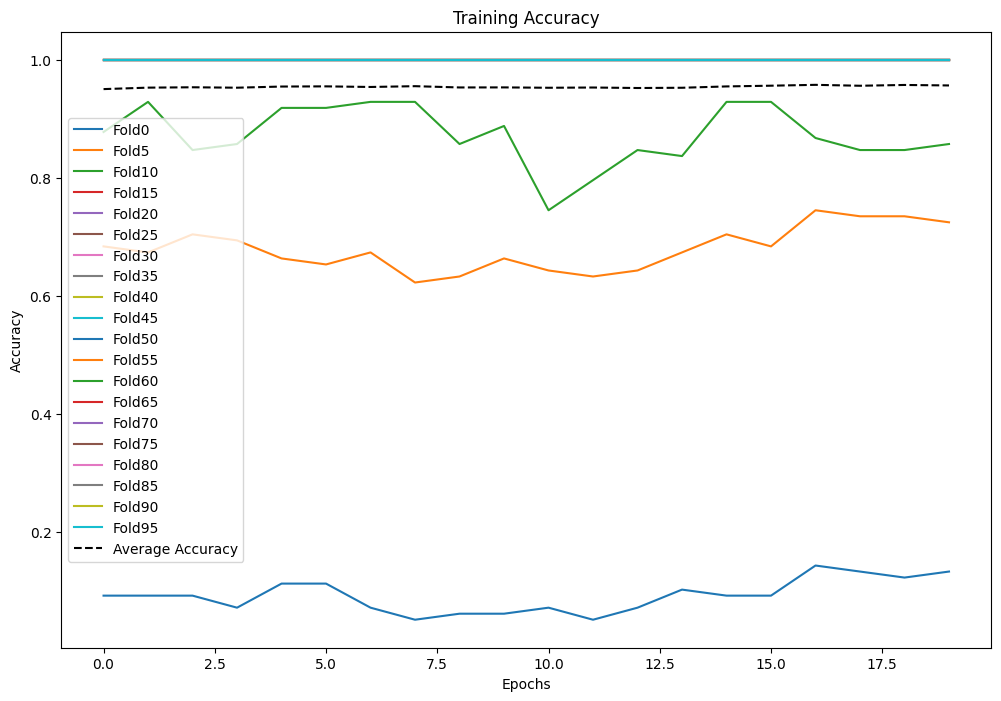

In [59]:
import math

# Plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

fold_step = 5  # Display every 5th fold
fold_range = range(0, len(accuracies), fold_step)

for fold in fold_range:
    fold_accuracy = history[fold].history['sparse_categorical_accuracy']
    fold_epochs = range(fold * epochs, (fold) * epochs)
    plt.plot(range(epochs), fold_accuracy, label=f'Fold{fold}')

plt.title('Training Accuracy')

# Calculate the average accuracy across all folds
average_accuracy = np.mean([history[fold].history['sparse_categorical_accuracy'] for fold in range(len(losses))], axis=0)
plt.plot(range(epochs), average_accuracy, label='Average Accuracy', color='black', linestyle='--')

plt.legend()
plt.show()

Yikes!  It looks like 20 folds is plenty enough, strange that the repeated SKF performed earlier didn't converge on 1.0 as quickly as it did here.  Let's examine how the accuracy improved per epoch; across all folds averaged. 

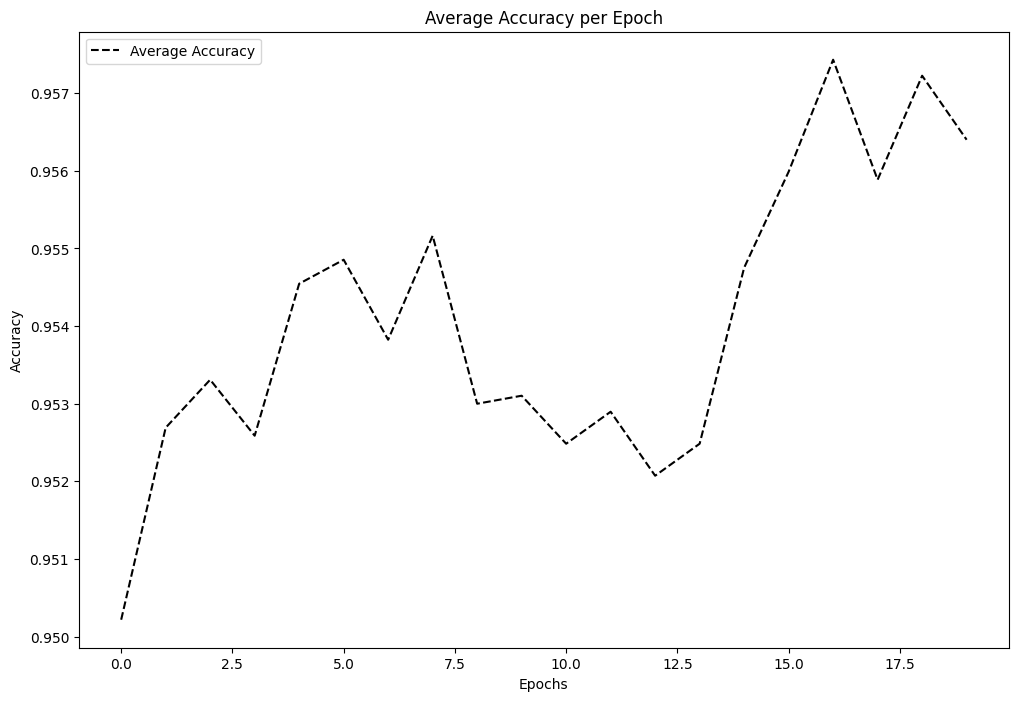

In [311]:
import math

# Plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Average Accuracy per Epoch')

# Calculate the average accuracy across all folds
average_accuracy = np.mean([history[fold].history['sparse_categorical_accuracy'] for fold in range(len(losses))], axis=0)
plt.plot(range(epochs), average_accuracy, label='Average Accuracy', color='black', linestyle='--')

plt.legend()
plt.show()

# Evaluating the Model on Test Set

Now that we've finished training and fitting the model, we can generate predictions and test it out against some real data.
First, we can evaluate the applicability to new data:

In [313]:
refined_model.evaluate(X_cust_test,Y_cust_test)

3/3 [==============================] - 0s 8ms/step - loss: 33.3893 - sparse_categorical_accuracy: 0.3939


[33.38926696777344, 0.39393940567970276]

###### Predictions

That's a shame, accuracy that poor is an indicator that we've vastly overfit the data.  We'll still see how well it's able to predict what images will be:

1/1 [==============================] - 0s 54ms/step


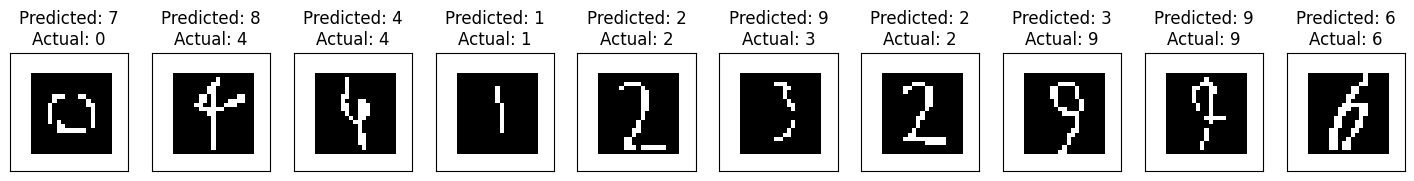

In [316]:
# zip up all the X and Y for enumeration 
def makePredictions(model, X_in,Y_in):
    pred_out = []
    for i, (sample, label) in enumerate(zip(X_in, Y_in)):
        prediction = refined_model.predict(X_in)
        pred_out.append((sample, prediction, Y_in[i]))

    fig, axs = plt.subplots(ncols=10)
    n = 0
    for ax, (img, pred, lbl) in zip(axs, pred_out):

        fig.set_size_inches(18, 4)
        ax.imshow(img, cmap="binary")
        pred_label = np.argmax(pred[n]) #np.argmax(ax)
        actual_label = lbl
        ax.set_title("Predicted: {}\nActual: {}".format(pred_label,actual_label))#, Y_cust_new))
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        n = n+1;
        
X_cust_new,Y_cust_new = X_cust_test[:10], Y_cust_test[:10]
makePredictions(refined_model,X_cust_new,Y_cust_new)


##### Examining the incorrect predictions

While somewhat a relief to know my model was stuck on the MNIST layer, we can infer that the model is overfitting the data.

As seen above, 0, 4, 3, and 2 are incorrectly predicted.   This coincides to the ~49% accuracy we computed above.  Let's give it another round of training, see if this can still be salvaged:

Epoch 1/20
4/4 [==============================] - 0s 10ms/step - loss: 5.4449e-06 - sparse_categorical_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 15ms/step - loss: 5.4352e-06 - sparse_categorical_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 5.4136e-06 - sparse_categorical_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 14ms/step - loss: 5.3871e-06 - sparse_categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 8ms/step - loss: 5.3269e-06 - sparse_categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 14ms/step - loss: 5.3100e-06 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 10ms/step - loss: 5.3160e-06 - sparse_categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 13ms/step - loss: 5.3341e-06 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==========================

array([[9.0287507e-20, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3089545e-10, 0.0000000e+00, 3.0458700e-19, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        5.2014736e-28, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.0279652e-26, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.2248944e-19, 1.4578909e-16],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6878057e-36,
        3.0150648e-32, 1.7757847e-21],
       [0.0000000e+00, 5.6801021e-37, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.7939383e-06, 6.5153178e-20, 1.3417782e-09,
        0.0000000e+00, 0.0000000e+00, 7.1296351e-11, 1.21

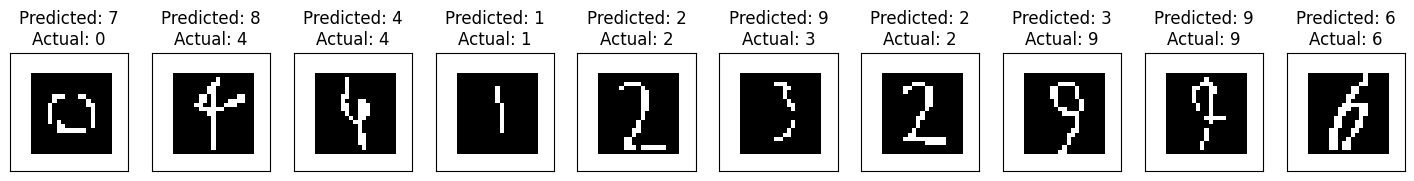

In [325]:
refined_model.fit(X_cust_train, Y_cust_train, epochs=20, batch_size=32, use_multiprocessing=True,shuffle=True)
refined_model.evaluate(X_cust_test, Y_cust_test)

makePredictions(refined_model,X_cust_test[:10],Y_cust_test[:10])

Overall, the network I had set out to train was unable to accurately attain a desirable accuracy.  More research and image processing techniques will need to be explored in order to raise this further.  In more complicated images, using layers like Conv2D can be helpful for identifying features from images in CNNs.  Here, I did not try that.  I think the preprocessing steps went awry because a lot of the images don't seem to be normalized per the 20x20 -> 28x28 standard described way back in one of the earlier sections.

Nonetheless, this was a fantastic exploration in the capabilities (as well as their difficulties and pitfalls) presented by neural networks.  The kinds of notebooks I've seen while researching a variety of strategies and documents honestly blew my mind.  I'm definitely going to be coming back to this for a while to see if I can get the network to make more accurate predictions.  I'd like to see 80% or higher accuracy in a set of 10. 

Vincent, 5/18/2023